Using Energy efficiency dataset to train the model.\
The dataset is available on UCI Machine Learning Repository.\

Link of dataset: https://drive.google.com/file/d/1H5DBqCnl_fXNCO6KScJEH8iCKsRc0epD/view?usp=sharing

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import keras
import tensorflow as tf
from keras.layers import Dense, Input
from keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ENB2012_data.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28,NaN,NaN


In [4]:
df.shape

(1296, 12)

In [5]:
df.isna().sum()

X1              528
X2              528
X3              528
X4              528
X5              528
X6              528
X7              528
X8              528
Y1              528
Y2              528
Unnamed: 10    1296
Unnamed: 11    1296
dtype: int64

The dataset has 8 independent features and 2 dependent features.\
Removing the unwanted columns and rows with NULL entries.

In [6]:
df.drop(['Unnamed: 10','Unnamed: 11'],axis='columns',inplace=True)
df.dropna(axis = 'rows', inplace=True)
df.shape

(768, 10)

In [7]:
x = df.iloc[:,:8]
y1 = df['Y1']
y2 = df['Y2']
x.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0


In [8]:
y1 = np.array(y1)
y2 = np.array(y2)
y1[:5],y2[:5]

(array([15.55, 15.55, 15.55, 15.55, 20.84]),
 array([21.33, 21.33, 21.33, 21.33, 28.28]))

In [9]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(x)
x = std.transform(x)
print(x[0])

[ 2.04177671 -1.78587489 -0.56195149 -1.47007664  1.         -1.34164079
 -1.76044698 -1.81457514]


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y1_train,y1_test,y2_train,y2_test = train_test_split(x,y1,y2,test_size=0.2)

In [11]:
y1_train.shape,y2_train.shape

((614,), (614,))

Models training and prediction using Functional API

In [12]:
from keras.models import Model

def build_model():
  input = Input(shape=(8,))
  dense1 = Dense(128,activation='relu')(input)
  dense2 = Dense(64, activation = 'relu')(dense1)

  output1 = Dense(1, name='out1')(dense2)
  dense3 = Dense(32,activation = 'relu')(dense2)
  output2 = Dense(1, name = 'out2')(dense3)

  model = Model(inputs=input,outputs=[output1,output2])
  return model

In [13]:
model = build_model()

In [14]:
model.compile(optimizer='adam',loss = {'out1':'mse','out2':'mse'})

In [15]:
his = model.fit(x = x_train, y=[y1_train,y2_train],epochs=100)

Epoch 1/100
20/20 [==============================] - 13s 2ms/step - loss: 1208.7534 - out1_loss: 562.0540 - out2_loss: 646.6993
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1024.1001 - out1_loss: 483.9146 - out2_loss: 540.1855
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 524.3181 - out1_loss: 317.2286 - out2_loss: 207.0895
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 203.1815 - out1_loss: 140.7098 - out2_loss: 62.4717
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 93.4807 - out1_loss: 55.0778 - out2_loss: 38.4029
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 65.0033 - out1_loss: 32.2871 - out2_loss: 32.7162
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 53.6398 - out1_loss: 25.4440 - out2_loss: 28.1957
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 47.2804 - out1_loss: 23.0373 - out2_loss: 24.2432
Ep

In [16]:
y_pred=model.predict(x_test)

In [17]:
len(y_pred)

2

In [18]:
from sklearn.metrics import mean_squared_error as mse
print('Error for y1: ', mse(y_pred[0],y1_test))
print('Error for y2: ', mse(y_pred[1],y2_test))

Error for y1:  4.7529755398735745
Error for y2:  7.261465075059144


In [19]:
print('Predicted values: ',y_pred[0][:5])
print('Actual values: ',y1_test[:5])

Predicted values:  [[11.280081]
 [39.35876 ]
 [12.565216]
 [17.92421 ]
 [30.873701]]
Actual values:  [12.18 40.68 12.25 18.46 32.84]


In [20]:
print('Predicted values: ',y_pred[1][:5])
print('Actual values: ',y2_test[:5])

Predicted values:  [[14.364762]
 [37.5994  ]
 [15.307201]
 [20.51624 ]
 [31.250893]]
Actual values:  [15.03 40.36 15.23 21.53 32.88]


Visualisation

In [21]:
import matplotlib.pyplot as plt
his_dict = his.history
his_dict.keys()

dict_keys(['loss', 'out1_loss', 'out2_loss'])

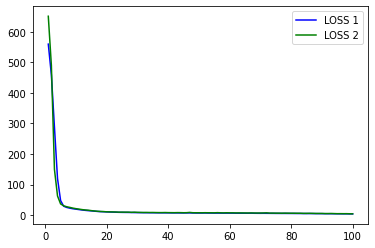

In [22]:
loss1 = his.history['out1_loss']
loss2 = his.history['out2_loss']
epochs = list(range(1,len(loss1)+1))
plt.plot(epochs,loss1,'b',label='LOSS 1')
plt.plot(epochs,loss2,'g',label='LOSS 2')
plt.legend()
plt.show()

Since the error corresponding to y2 is very high, we use a different model to train and tune the parameters.

Using custom model and custom loss function for model training.

In [23]:
from keras.layers import Layer

# custom dense layer
class SimpleDense(Layer):
  def __init__(self, units=32, activation= None):  # by default a dense layer of 32 units
    super(SimpleDense, self).__init__()
    self.units = units
    self.activation = tf.keras.activations.get(activation)
    
  def build(self, input_shape):  # Initializing trainable weights and biases
    w_init = tf.random_normal_initializer()
    self.w = tf.Variable(name = 'kernel', initial_value = w_init(shape = (input_shape[-1],self.units),dtype = 'float32'), trainable= True)

    b_init = tf.zeros_initializer()
    self.b = tf.Variable(name = 'bias', initial_value = b_init(shape = (self.units,),dtype = 'float32'), trainable= True)

  def call(self, inputs):  # defines computation, called by constructor of the class
    return(self.activation(tf.matmul(inputs,self.w)+self.b))

In [48]:
# custom loss function: huber loss
from keras.losses import Loss
class myHuberLoss(Loss):
  threshold = 1
  def __init__(self, threshold):
    super().__init__()
    self.threshold = threshold
  
  def call(self,y_true,y_pred):
    y_true = tf.cast(y_true, tf.float64)
    y_pred = tf.cast(y_pred, tf.float64)
    error = y_true-y_pred
    is_small_error = tf.abs(error)<=self.threshold
    small_error_loss = tf.square(error)*0.1
    big_error_loss = self.threshold * (tf.abs(error)- 0.5 * self.threshold)
    return tf.where(is_small_error, small_error_loss, big_error_loss)  # (condition, if true, else)


In [25]:
from keras.models import Model

def build_model2():
  model = Sequential([
                      Dense(16, activation='relu', input_shape = (8,)),
                      SimpleDense(units=32, activation = 'relu'),
                      SimpleDense(units = 64, activation = 'relu'),
                      SimpleDense(1)
  ])
  return model

In [26]:
# fitting model and using early stopping technique
model2 = build_model2()
model2.compile(optimizer= 'adam', loss = myHuberLoss(threshold=0.8))
his2 = model2.fit(x_train,y = y2_train, epochs=500, validation_split=0.1, callbacks= [keras.callbacks.EarlyStopping(patience=20, monitor = 'loss', restore_best_weights=True)])

Epoch 1/500
18/18 [==============================] - 2s 28ms/step - loss: 18.7526 - val_loss: 20.1562
Epoch 2/500
18/18 [==============================] - 0s 3ms/step - loss: 19.0391 - val_loss: 19.5087
Epoch 3/500
18/18 [==============================] - 0s 3ms/step - loss: 18.0752 - val_loss: 17.1405
Epoch 4/500
18/18 [==============================] - 0s 2ms/step - loss: 14.9498 - val_loss: 10.6513
Epoch 5/500
18/18 [==============================] - 0s 3ms/step - loss: 8.0900 - val_loss: 4.1892
Epoch 6/500
18/18 [==============================] - 0s 3ms/step - loss: 4.3683 - val_loss: 3.8229
Epoch 7/500
18/18 [==============================] - 0s 2ms/step - loss: 3.6370 - val_loss: 3.6755
Epoch 8/500
18/18 [==============================] - 0s 2ms/step - loss: 3.5716 - val_loss: 3.5256
Epoch 9/500
18/18 [==============================] - 0s 2ms/step - loss: 3.3537 - val_loss: 3.4259
Epoch 10/500
18/18 [==============================] - 0s 3ms/step - loss: 3.2041 - val_loss: 3.2543


In [27]:
y_pred2 = model2.predict(x_test)

In [28]:
# Calculating the mean squared error
from sklearn.metrics import mean_squared_error as mse
print('Error for y2: ', mse(y_pred2,y2_test))

Error for y2:  4.210141322480229


In [29]:
print('Predicted values: ',y_pred2[:5])
print('Actual values: ', y2_test[:5])

Predicted values:  [[14.896695]
 [39.158104]
 [14.017791]
 [21.98635 ]
 [33.16597 ]]
Actual values:  [15.03 40.36 15.23 21.53 32.88]


Visualisation of loss vs epoch

In [30]:
his2.history.keys()

dict_keys(['loss', 'val_loss'])

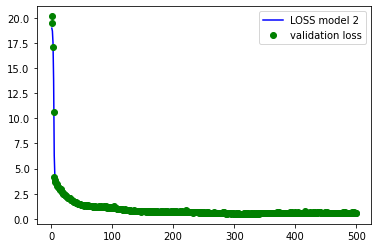

In [31]:
loss2 = his2.history['loss']
val_loss = his2.history['val_loss']
epochs = list(range(1,len(loss2)+1))
plt.plot(epochs,loss2,'b',label='LOSS model 2')
plt.plot(epochs,val_loss,'go',label='validation loss')
plt.legend()
plt.show()

Some small changes in loss fucntion improved the performance of the model. The updated huber loss function reduced the speed of updating weights and biases for smaller loss.\
Early stopping was used to restore the best parameters to train the model.

Functional API was implemented, losses were compared. A custom dense layer was designed. The custom huber loss function improved the model performance by some extent.

**Training model for y1.**\
Implementing model compilation and fitting from scratch.\
Use of custom huber loss function.



In [57]:
model1 = Sequential([
                      Dense(16, activation='relu', input_shape = (8,)),
                      Dense(units=32, activation = 'relu'),
                      Dense(units = 64, activation = 'relu'),
                      Dense(1)
  ])

In [58]:
# applying gradient on batch of dataset
#myloss = myHuberLoss(threshold = 0.8)
def apply_gradient(optimizer, model1, x,y):
  with tf.GradientTape() as tape:
    logits = model1(x)
    loss_value = tf.keras.losses.MSE(y, logits)
  gradients = tape.gradient(loss_value, model1.trainable_weights)
  optimizer.apply_gradients(zip(gradients, model1.trainable_weights))
  return logits,loss_value

In [59]:
def perform_validation():
  losses = []
  for batch in test:
    x_val, y_val = batch[:,:8],batch[:,8]
    val_logits = model1(x_val)
    val_loss = tf.keras.losses.MSE(y_val, val_logits)
    losses.append(val_loss)
  return losses

In [60]:
def train_data_for_one_epoch():
  losses = []
  for batch in train:
    x_batch_train, y_batch_train = batch[:,:8],batch[:,8]
    #print(x_batch_train.shape, y_batch_train.shape)
    logits, loss = apply_gradient(optimizer,model1,x_batch_train, y_batch_train)
    losses.append(loss)
  return losses

In [61]:
# preparing dataset to yeild batches of examples
train_dataset = pd.DataFrame(x_train)
train_dataset['target'] = y1_train
train_dataset = tf.data.Dataset.from_tensor_slices(train_dataset)
test_dataset = pd.DataFrame(x_test)
test_dataset['target'] = y1_test
test_dataset = tf.data.Dataset.from_tensor_slices(test_dataset)
train = train_dataset.shuffle(len(y1_train)).repeat(2).batch(64,drop_remainder = True)
test = test_dataset.batch(64,drop_remainder=True)
train,test

(<BatchDataset shapes: (64, 9), types: tf.float64>,
 <BatchDataset shapes: (64, 9), types: tf.float64>)

In [62]:
epochs = 50
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
val_losses, train_losses = [],[]
for epoch in range(epochs):
  print('Start of %d epoch'%(epoch+1))

  losses_train = train_data_for_one_epoch()
  losses_val = perform_validation()

  train_losses.append(np.mean(losses_train))
  val_losses.append(np.mean(losses_val))

  print('\t Train loss : {}, val loss : {}'.format(train_losses[-1],val_losses[-1]))


Start of 1 epoch
	 Train loss : 578.8919677734375, val loss : 616.2180786132812
Start of 2 epoch
	 Train loss : 551.8404541015625, val loss : 582.7156982421875
Start of 3 epoch
	 Train loss : 512.9132080078125, val loss : 533.9613647460938
Start of 4 epoch
	 Train loss : 457.8067321777344, val loss : 460.697509765625
Start of 5 epoch
	 Train loss : 372.1768493652344, val loss : 358.4390869140625
Start of 6 epoch
	 Train loss : 266.4537353515625, val loss : 245.21237182617188
Start of 7 epoch
	 Train loss : 174.31414794921875, val loss : 164.1023712158203
Start of 8 epoch
	 Train loss : 129.5884246826172, val loss : 138.18157958984375
Start of 9 epoch
	 Train loss : 122.47525024414062, val loss : 132.7157745361328
Start of 10 epoch
	 Train loss : 119.4693832397461, val loss : 129.87002563476562
Start of 11 epoch
	 Train loss : 116.41510009765625, val loss : 127.13402557373047
Start of 12 epoch
	 Train loss : 114.51850128173828, val loss : 124.3623046875
Start of 13 epoch
	 Train loss : 

In [63]:
y_pred = model1(x_test)
print(mse(y1_test,y_pred))

109.05284380381967


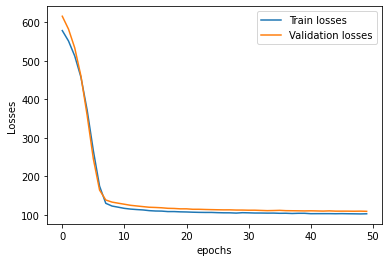

In [64]:
plt.plot(list(range(epochs)),train_losses, label = 'Train losses')
plt.plot(list(range(epochs)), val_losses, label = 'Validation losses')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.show()

We can see that loss reduces significantly on training. However this model doesnot perform as good as our previous models. 

Training dataset was shuffled, entire procedure of compile and fit was implemented from scratch. Tuned the learning rate of optimizer and tried different optimizers and loss functions but did not gave results even close to regular model optimization and fitting. The loss was really very high in this case.